## Kaggle API Installation

In [7]:
#!pip install kaggle --upgrade

## Download and unzip the Fraud Detection dataset

Note: You may need to join the competition and accept the terms first.

In [8]:
#!kaggle competitions download -c ieee-fraud-detection
#!unzip ieee-fraud-detection.zip

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Reading CSV files

Note: train_transaction.csv is going to be used for training and testing the model.

In [10]:
#sample_submission = pd.read_csv('sample_submission.csv')
#test_identity = pd.read_csv('test_identity.csv')
#test_transaction = pd.read_csv('test_transaction.csv')
#train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

## Separating frauds and non frauds

Note: Only 3.5% of the data is from the Fraud class

In [11]:
frauds_train = train_transaction[train_transaction['isFraud'] == 1]
nonfrauds_train = train_transaction[train_transaction['isFraud'] == 0]
print(f'Number of frauds: {len(frauds_train)}')
print(f'Number of non-frauds: {len(nonfrauds_train)}')
print(f'Frauds ratio: {np.round(100 * len(frauds_train)/(len(nonfrauds_train) + len(frauds_train)), 2)}%')

Number of frauds: 20663
Number of non-frauds: 569877
Frauds ratio: 3.5%


## Visualizing the fraud and non-fraud data by the credit card brand

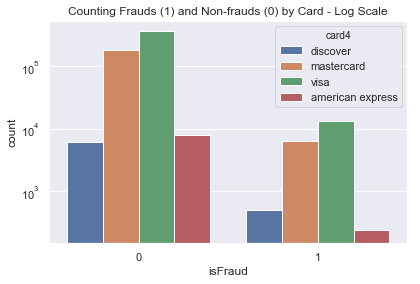

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
sns.countplot(x='isFraud', hue='card4', data=train_transaction, log=True)
plt.tight_layout()
plt.title('Counting Frauds (1) and Non-frauds (0) by Card - Log Scale')
plt.show()

## Making the "Frauds" and "Non-frauds" classes have the same number of samples

In [41]:
nonfrauds_train = nonfrauds_train.sample(20663)
train_transaction = pd.concat([frauds_train,nonfrauds_train])

## Removing NaN, categorical and index columns

In [42]:
#features = ['TransactionAmt'] + ['V%d' % number for number in range(1, 339)]
train_transaction.dropna(axis=1, inplace = True)
train_transaction = train_transaction.drop(['TransactionID', 'ProductCD', 'card1'], axis=1)

## Separating features X and labels y

In [43]:
X = train_transaction.drop(['isFraud'], axis=1)

y = train_transaction['isFraud']

## Splitting training and testing data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Logistic Regression Model

Regularization C = 10^5

In [45]:
model = LogisticRegression(C=1e5)

model.fit(X_train, y_train)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Testing the Model

In [46]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.28      0.40      6173
           1       0.55      0.88      0.68      6225

   micro avg       0.58      0.58      0.58     12398
   macro avg       0.63      0.58      0.54     12398
weighted avg       0.63      0.58      0.54     12398

